# **Momento de Retroalimentación: Módulo 1 Utilización, procesamiento y visualización de grandes volúmenes de datos (Portafolio Análisis)**

### Andrés Alejandro Guzmán González - A01633819

#### Inteligencia artificial avanzada para la ciencia de datos II

#### Grupo 502
---

1 - Configura correctamente tu entorno de trabajo en Colab para utilizar PySpark (Preparación del ambiente de trabajo para Big Data en Colab)

>   1.1 - Instalar y preparar Google Colab para trabajar con PySpark

In [ ]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=ed99f2df847bcd86b63d2be3dcbccca951ba843bc8ed347c0563c66caf38493b
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


>   1.2 - Llamado a librerías

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

>   1.3 - Se leventa la sesión en Spark

In [ ]:
spark = SparkSession \
       .builder \
       .appName("AlexGuzmn") \
       .getOrCreate()

spark

2 - Una vez configurado tu ambiente de trabajo selecciona una base de datos que se caracterice por tener un gran volumen de datos.



> Las bases de datos se obtuvieron de este [repositorio](https://github.com/apache/spark/tree/master/data/mllib).



3 - Utilizando MLlib genera un modelo inteligente de clasificación, regresión o agrupamiento con la base de datos que seleccionaste

> 3.1 - Modelo de regresión lineal



In [ ]:
training = spark.read.format("libsvm")\
    .load("/content/sample_data/sample_linear_regression_data.txt")

In [ ]:
# Se define el modelo de regresión lineal
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Ajuste del modelo
lrModel = lr.fit(training)

# Se imprimen los coeficientes y la intercepción del modelo
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Resumen del modelo
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
residuals = trainingSummary.residuals.toPandas()
rmse = trainingSummary.rootMeanSquaredError
r2 = trainingSummary.r2
print("RMSE: %f" % rmse)
print("r2: %f" % r2)

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356
numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


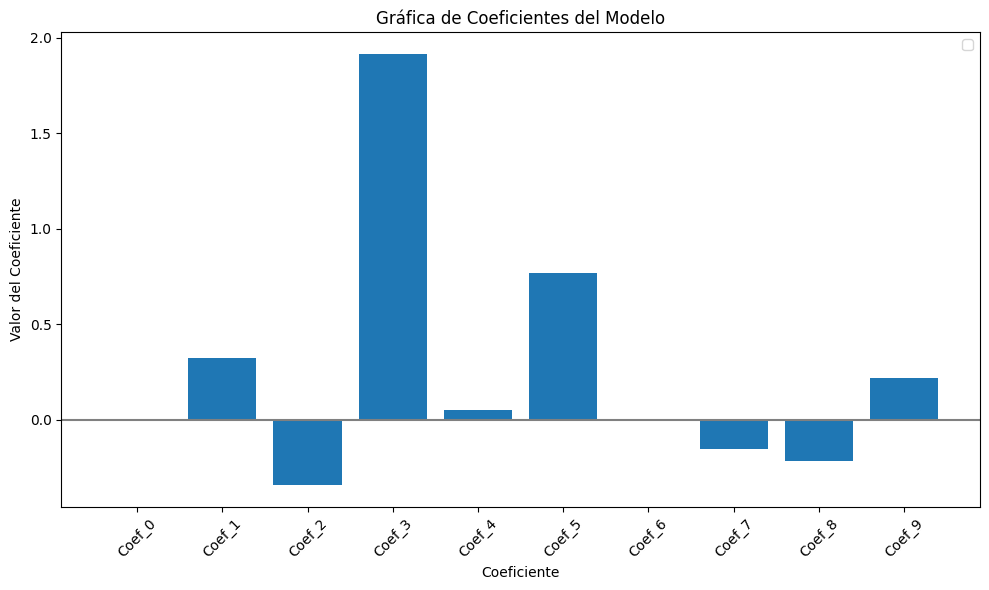

In [ ]:
coef_labels = [f'Coef_{i}' for i in range(len(lrModel.coefficients))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(coef_labels, lrModel.coefficients)
plt.xlabel('Coeficiente')
plt.ylabel('Valor del Coeficiente')
plt.title('Gráfica de Coeficientes del Modelo')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='-', linewidth=1.5)

plt.tight_layout()
plt.legend()
plt.show()

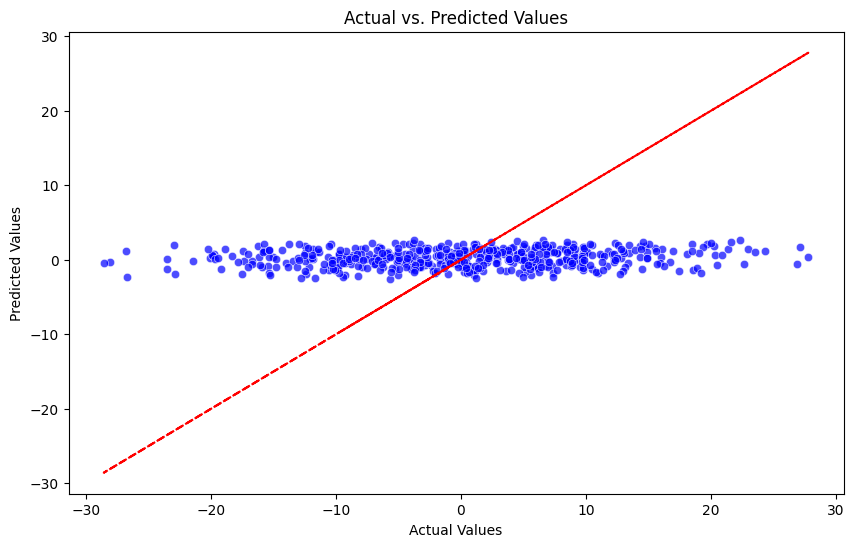

In [ ]:
# Realizar predicciones utilizando el modelo y graficar la dispersión
predictions = lrModel.transform(training).toPandas()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='label', y='prediction', data=predictions, color="b",alpha=0.7)
plt.plot(predictions['label'], predictions['label'], color='r', linestyle='--', label='Regression Line')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

> 3.2 - Modelo de regresión logística


In [ ]:
# Carga de datos
training = spark.read.format("libsvm").load("/content/sample_data/sample_libsvm_data.txt")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Ajuste del modelo
lrModel = lr.fit(training)

# Imprimir los coeficientes o intersecciones de la regresión logística
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

mlrModel = mlr.fit(training)
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Coefficients: (692,[272,300,323,350,351,378,379,405,406,407,428,433,434,435,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.520689871384125e-05,-8.115773146847006e-05,3.814692771846427e-05,0.0003776490540424338,0.0003405148366194403,0.0005514455157343107,0.0004085386116096912,0.0004197467332749452,0.0008119171358670031,0.000502770837266875,-2.3929260406600902e-05,0.0005745048020902297,0.0009037546426803677,7.818229700243899e-05,-2.1787551952911914e-05,-3.402165821789542e-05,0.0004966517360637633,0.0008190557828370372,-8.017982139522613e-05,-2.743169403783527e-05,0.0004810832226238988,0.0004840801762677878,-8.926472920009901e-06,-0.00034148812330427297,-8.950592574121382e-05,0.00048645469116892156,-8.478698005186097e-05,-0.00042347832158317705,-7.296535777631246e-05])
Intercept: -0.5991460286401438
Multinomial coefficients: 2 X 692 CSRMatrix
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0002
(0,351) -0.0001
(0,378) -0.0003
(0,379) -0.0002
(0,405) -0.0002
(0,406) -0.0004
(0,4

In [ ]:
'''
Se extrae el resumen del modelo de Regresión Logística devuelto en la
instancia anterior, entrenado en el ejemplo anterior.
'''
trainingSummary = lrModel.summary

# Se obtiene el objetivo por iteración.
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Se establece el umbral del modelo para maximizar la puntuación F.
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.6833149135741672
0.6661906127558117
0.6207433672479603
0.6131541253123869
0.6059149689952393
0.5923656241678249
0.589823308283802
0.5868012627420282
0.5844432058719142
0.5830790068041746
0.5807015754032354
+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0


LogisticRegression_175bffbc3cef

In [ ]:
len(lrModel.coefficients)

692

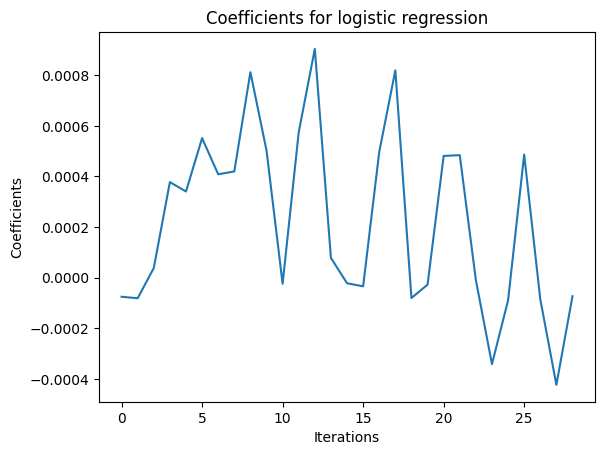

In [ ]:
plt.plot(lrModel.coefficients)
plt.xlabel("Iterations")
plt.ylabel("Coefficients")
plt.title("Coefficients for logistic regression")
plt.show()

> 3.3 - Modelo de clusters

In [ ]:
# Carga de datos
dataset = spark.read.format("libsvm").load("/content/sample_data/sample_kmeans_data.txt")

# Se entrena un modelo de k-means.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Se realizan las prediccionjes
predictions = model.transform(dataset)

# Se evalúa el agrupamiento calculando el puntaje Silhouette.
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Se muestra el resultado
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.9997530305375207
Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


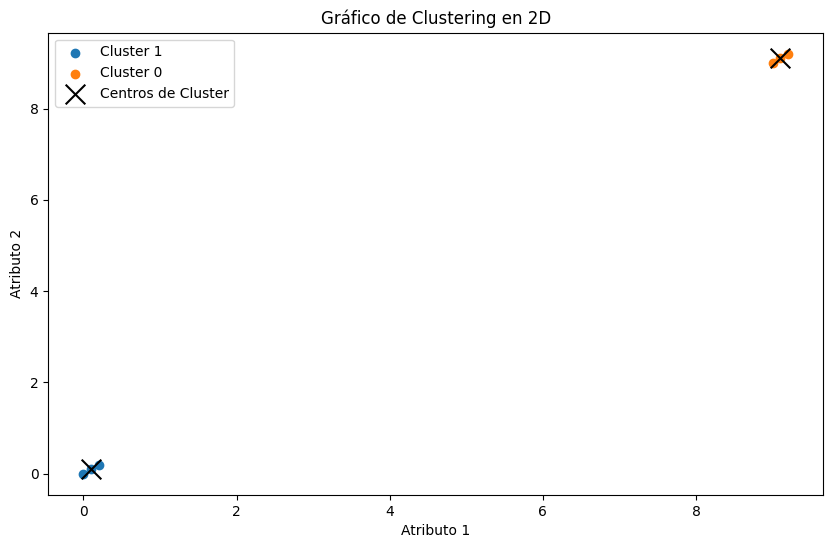

In [ ]:
import matplotlib.pyplot as plt

# Extrae los datos de entrada (atributos) y las etiquetas de clúster de las predicciones.
features = predictions.select("features").rdd.map(lambda row: row.features)
cluster_labels = predictions.select("prediction").rdd.map(lambda row: row.prediction)

# Convierte los datos a una lista de Python.
features_list = features.collect()
cluster_labels_list = cluster_labels.collect()

# Convierte los centros de clúster a una lista de Python.
cluster_centers = model.clusterCenters()

# Separa los datos en función de las etiquetas del clúster.
cluster_data = {}
for i, label in enumerate(cluster_labels_list):
    if label in cluster_data:
        cluster_data[label].append(features_list[i])
    else:
        cluster_data[label] = [features_list[i]]

# Grafica los datos en 2D.
plt.figure(figsize=(10, 6))

for label, data in cluster_data.items():
    data = list(zip(*data))  # Desempaqueta los datos
    plt.scatter(data[0], data[1], label=f'Cluster {label}')

# Grafica los centros de clúster.
center_data = list(zip(*cluster_centers))  # Desempaqueta los centros de clúster
plt.scatter(center_data[0], center_data[1], c='black', marker='x', s=200, label='Centros de Cluster')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.title('Gráfico de Clustering en 2D')
plt.show()


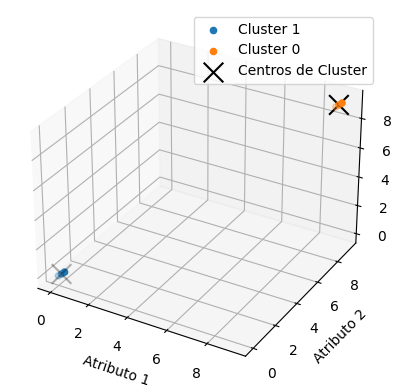

In [ ]:
# Grafica los datos en 3D.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label, data in cluster_data.items():
    data = list(zip(*data))  # Desempaqueta los datos
    ax.scatter(data[0], data[1], data[2], label=f'Cluster {label}')

# Grafica los centros de clúster.
center_data = list(zip(*cluster_centers))  # Desempaqueta los centros de clúster
ax.scatter(center_data[0], center_data[1], center_data[2], c='black', marker='x', s=200, label='Centros de Cluster')

ax.set_xlabel('Atributo 1')
ax.set_ylabel('Atributo 2')
ax.set_zlabel('Atributo 3')
ax.legend()
plt.show()
